In [29]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import healpy as hp
import emcee
from scipy import stats
import corner
import glob

In [75]:
file = 'multifreq.npz'

samples_ = np.load(file)['samples']
samples = np.array(samples_[:,2000:,:])
#print(samples.shape)

# just doing this cut by eye unfortunately
ndim=samples.shape[2]
idx = np.where(np.array(np.log10(samples[:,-1,0])) > 22.8)
samples = np.delete(samples, idx, 0)

samples_reshape = samples.reshape((-1, ndim))


for i in [0,1,2,4,5]:
        samples_reshape[:,i] = np.log10(samples_reshape[:,i])


(49, 13000, 12)


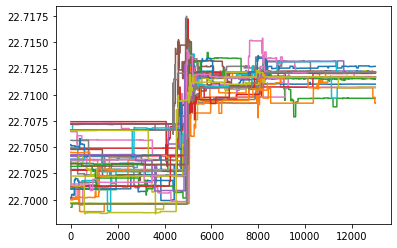

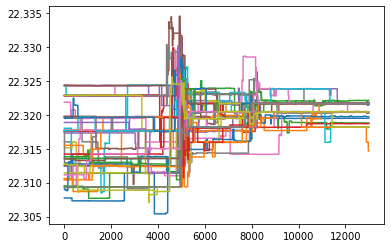

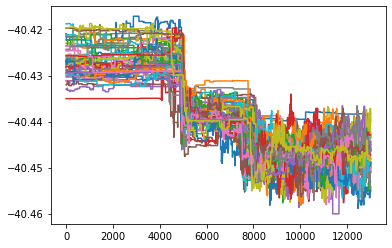

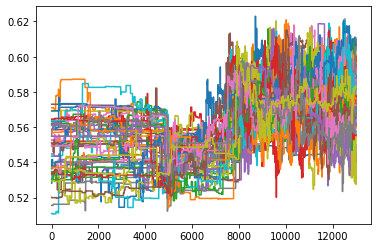

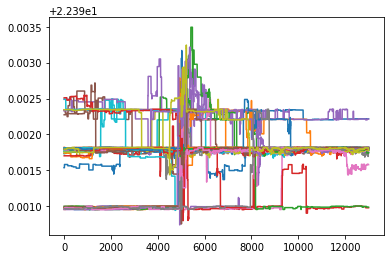

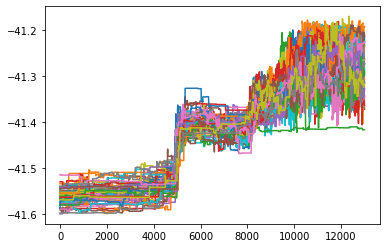

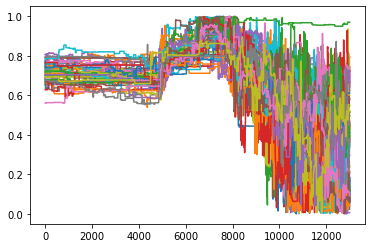

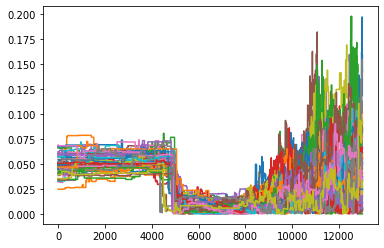

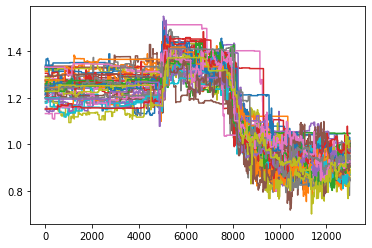

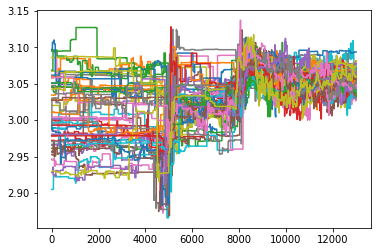

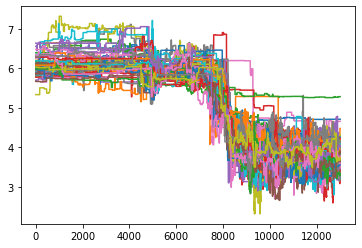

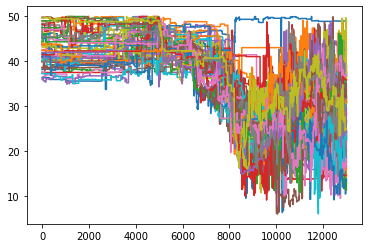

In [77]:
print(samples.shape)
for j in range(samples.shape[2]):
    plt.figure()
    for i in range(samples.shape[0]):
        plt.plot(samples[i,:,j])
    
#print(samples.shape)

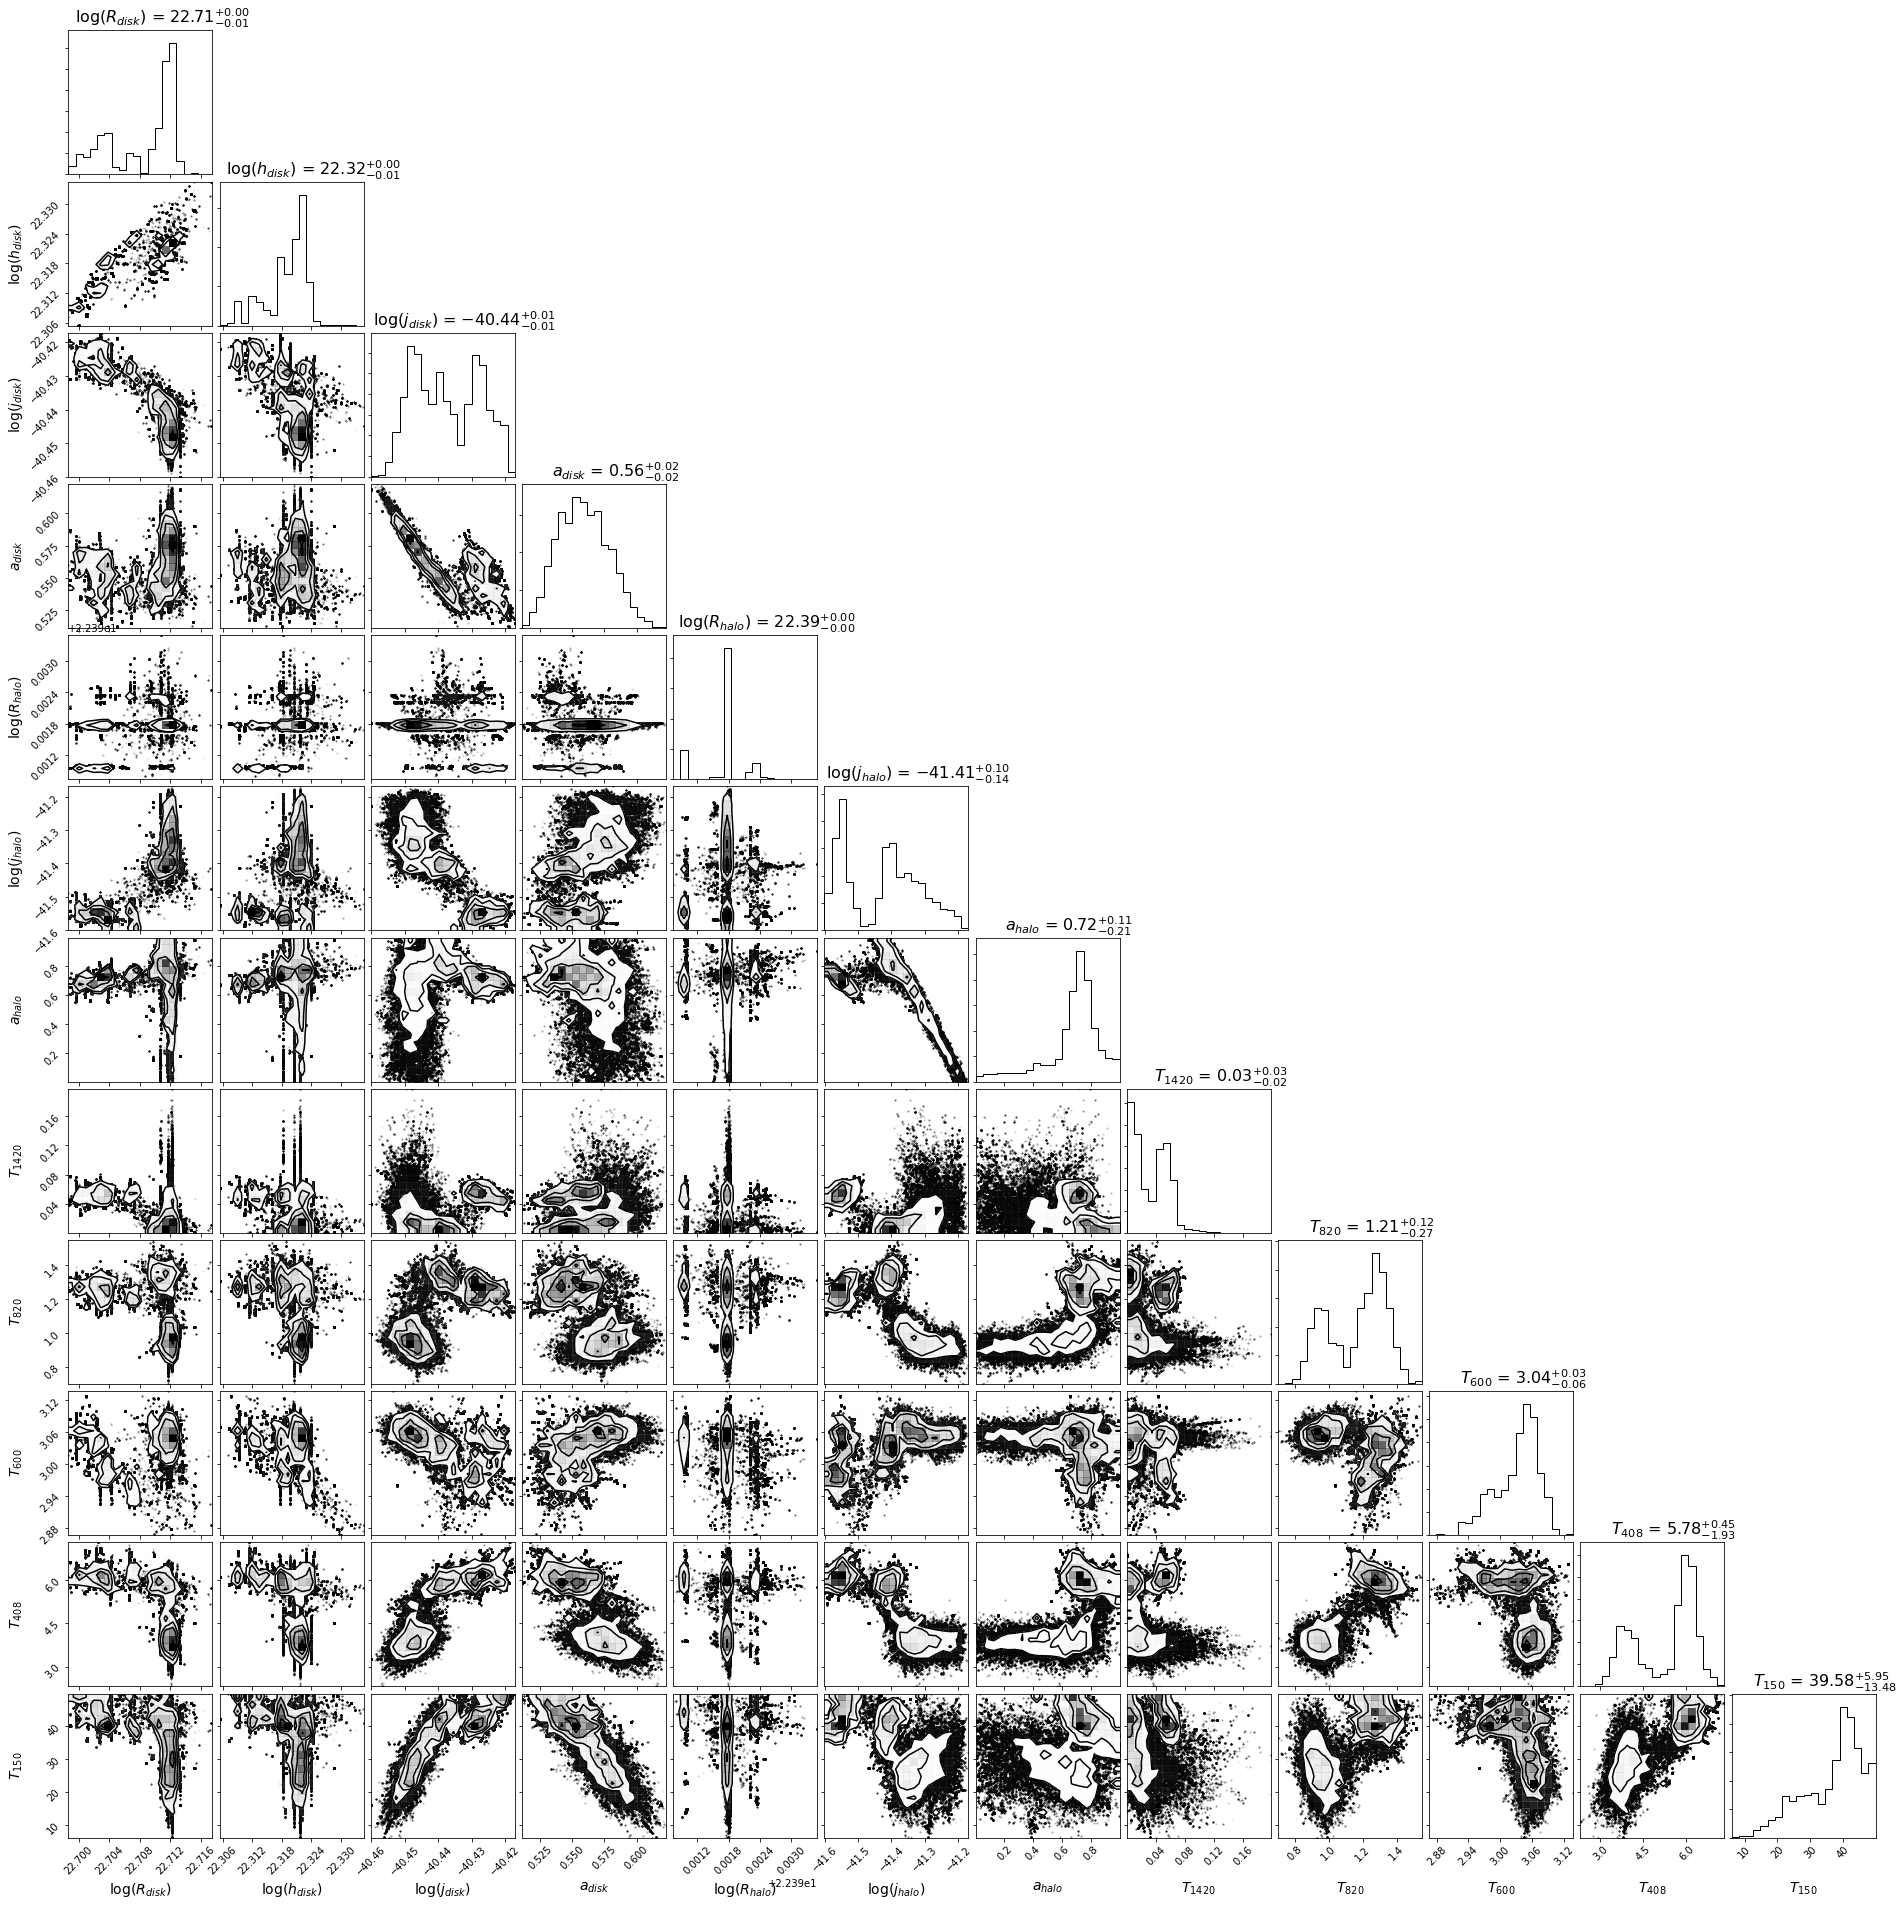

In [80]:
fig = corner.corner(samples_reshape, 
                     labels=["log($R_{disk}$)","log($h_{disk}$)","log($j_{disk}$)","$a_{disk}$",
                             "log($R_{halo}$)","log($j_{halo}$)","$a_{halo}$", 
                             "$T_{1420}$","$T_{820}$","$T_{600}$","$T_{408}$","$T_{150}$"],
                    label_kwargs={"fontsize": 14}, show_titles=True, title_kwargs={"fontsize": 16, "position":(0.65,1)},
                     #quantiles=[0.16,0.5,0.84]
                   )